In [5]:
print('Hello world')

Hello world


# heart disease project
This project is about classifying whether or not a patient has heart disease

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


The following table show heart disease information for patients.

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: xlabel='target'>

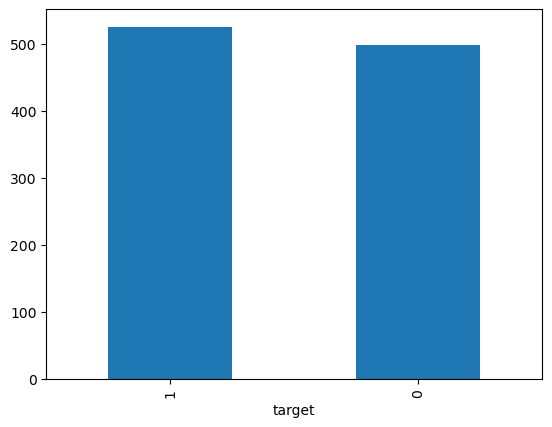

In [8]:
df.target.value_counts().plot(kind = "bar")

In [9]:
import matplotlib.pyplot as plt

## 1. Problem Definition 
Predict heart disease

## 2. Data
This is the data that we are using.

In [10]:
ls

 Volume in drive C is OS
 Volume Serial Number is D20E-878D

 Directory of C:\Users\User\Untitled Folder\Untitled Folder

07/12/2023  03:53 PM    <DIR>          .
29/11/2023  04:38 PM    <DIR>          ..
07/12/2023  02:28 PM    <DIR>          .ipynb_checkpoints
07/12/2023  03:15 PM            38,114 heart.csv
07/12/2023  03:53 PM            20,557 Untitled.ipynb
               2 File(s)         58,671 bytes
               3 Dir(s)  199,922,077,696 bytes free


In [11]:
grouped_df = df.groupby("sex").mean()
print(grouped_df)

           age        cp    trestbps        chol       fbs   restecg  \
sex                                                                    
0    55.849359  1.006410  133.701923  261.455128  0.134615  0.573718   
1    53.814867  0.914446  130.697055  239.237027  0.155680  0.510519   

        thalach     exang   oldpeak     slope        ca      thal    target  
sex                                                                          
0    150.830128  0.237179  0.921154  1.410256  0.580128  2.137821  0.724359  
1    148.363254  0.380084  1.137307  1.374474  0.830295  2.405330  0.420757  


In [12]:

# Define the age bins and labels
bins = [29, 39, 49, 59, 69, 79, 89]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Create a new column 'age_group' based on the age bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by the 'age_group' column and count the number of patients in each group
age_group_counts = df['age_group'].value_counts().sort_index()

# Display the result
print(age_group_counts)


age_group
30-39     43
40-49    234
50-59    393
60-69    312
70-79     43
80-89      0
Name: count, dtype: int64


In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,60-69
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,60-69
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,40-49
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,50-59


In [14]:

# Count the occurrences of each unique value in the "target" column
target_counts = df['target'].value_counts()

# Display the result
print(target_counts)


target
1    526
0    499
Name: count, dtype: int64


In [15]:

# Replace values in the "target" column with meaningful labels
df['target'] = df['target'].map({1: 'infected', 0: 'not infected'})

# Display the updated DataFrame
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal        target age_group  
0   2     3  not infected     50-59  
1   0     3  not infected     50-59  
2   0     3  not infected     70-79  
3   1     3  not infected     60-69  
4   3     2  not infected     60-69  


In [16]:
# Save the updated DataFrame to a new CSV file
df.to_csv("updated_heart.csv", index=False)


In [17]:


# Read the CSV file into a DataFrame
df = pd.read_csv("updated_heart.csv")

# Check for null values in each column
null_columns = df.columns[df.isnull().any()]

# Display columns with null values
if null_columns.empty:
    print("No null values in any column.")
else:
    print("Columns with null values:")
    print(df[null_columns].isnull().sum())


No null values in any column.


In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,not infected,50-59
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,not infected,50-59
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,not infected,70-79
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,not infected,60-69
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,not infected,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,infected,60-69
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,not infected,60-69
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,not infected,40-49
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,infected,50-59


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file into a DataFrame
df = pd.read_csv("heart.csv")

# Create age groups using pd.cut as before
bins = [29, 39, 49, 59, 69, 79, 89]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# One-hot encode the 'age_group' column
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

# Assuming 'target' column indicates infection status (1 for infected, 0 for not infected)
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_output)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)


In [23]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


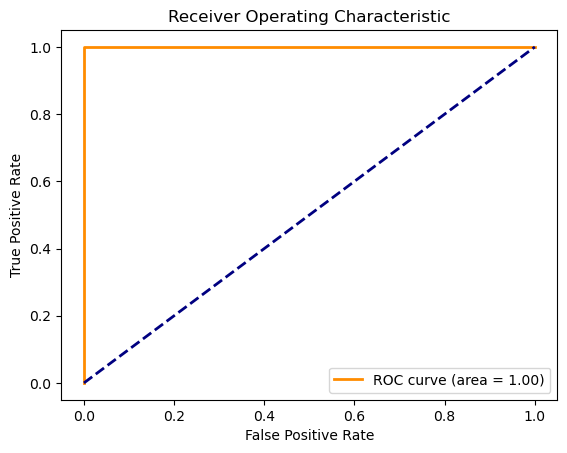

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


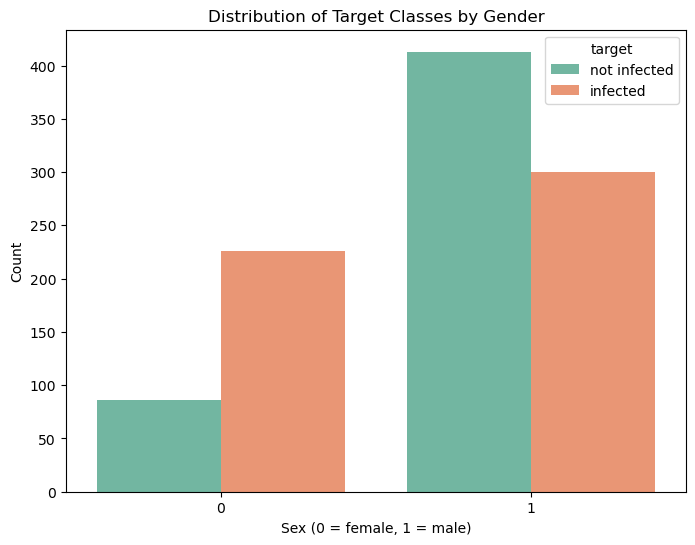

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("updated_heart.csv")

# Plot a count plot of 'sex' against 'target'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df, palette='Set2')
plt.title('Distribution of Target Classes by Gender')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.show()


In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,not infected,50-59
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,not infected,50-59
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,not infected,70-79
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,not infected,60-69
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,not infected,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,infected,60-69
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,not infected,60-69
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,not infected,40-49
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,infected,50-59
